In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter

from xgboost import XGBClassifier
import lightgbm as lgb

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import function to perform feature selection
from sklearn.feature_selection import RFE


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Colab Notebooks/ diabetes.csv"
data=pd.read_csv(path)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**COLUMN DESCRIPTION**



1. Diabetes_012 0 = no diabetes 1 = prediabetes 2 = diabetes
2. HighBP 0 = no high BP 1 = high BP
3. HighChol 0 = no high cholesterol 1 = high cholesterol
4. CholCheck 0 = no cholesterol check in 5 years 1 = yes cholesterol
check in 5 years
5. BMI Body Mass Index
6. Smoker Have you smoked at least 100 cigarettes in your entire
life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. Stroke (Ever told) you had a stroke. 0 = no 1 = yes
8. HeartDiseaseorAttack coronary heart disease (CHD) or myocardial
infarction (MI) 0 = no 1 = yes
9. PhysActivity physical activity in past 30 days - not including job 0 =
no 1 = yes
10. Fruits Consume Fruit 1 or more times per day 0 = no 1 = yes
11. Veggies Consume Vegetables 1 or more times per day 0 =
no 1 = yes
12. HvyAlcoholConsump Heavy drinkers (adult men having more
than 14 drinks per week and adult women having more than 7
drinks per week) 0 = no 1 = yes
13. AnyHealthcare Have any kind of health care coverage,
including health insurance, prepaid plans such as HMO, etc. 0 =
no 1 = yes
14. NoDocbcCost Was there a time in the past 12 months when
you needed to see a doctor but could not because of cost? 0 = no
1 = yesIncome
15. GenHlth Would you say that in general your health is: scale
1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth Now thinking about your mental health, which
includes stress, depression, and problems with emotions, for how
many days during the past 30 days was your mental health not
good? scale 1-30 days
17. PhysHlth Now thinking about your physical health, which
includes physical illness and injury, for how many days during the
past 30 days was your physical health not good? scale 1-30 days
18. DiffWalk Do you have serious difficulty walking or climbing
stairs? 0 = no 1 = yes
19. Sex 0 = female 1 = male
20. Age 13-level age category (_AGEG5YR see codebook) 1 =
18-24 9 = 60-64 13 = 80 or older
21. Education Education level (EDUCA see codebook) scale 1-6
1 = Never attended school or only kindergarten 2 = Grades 1
through 8 (Elementary) 3 = Grades 9 through 11 (Some high
school) 4 = Grade 12 or GED (High school graduate) 5 = College 1
year to 3 years (Some college or technical school) 6 = College 4
years or more (College graduate)
22. Income Income scale (INCOME2 see codebook) scale 1-8 1
= less than 10,0005=lessthan35,000 8 = $75,000 or moreIncome

In [6]:
data.shape

(253680, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
data.duplicated().sum()

23899

In [5]:
#removing the duplicates
data.drop_duplicates(inplace=True)
#checking the shape after removing duplicates
data.shape

(229781, 22)

In [11]:
data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:

#as per the description many columns should be of object datatype, instead it is saved as float
#making a copy of the original dataframe
df=data.copy(deep=True)


In [7]:
#changing the datatype of the columns for further analysis of categorical columns
df=df.astype(object)
df[["BMI","MentHlth","PhysHlth"]]=df[["BMI","MentHlth","PhysHlth"]].astype(int)
num=df.select_dtypes(exclude='object').columns
cat=df.select_dtypes(include="object").columns


In [15]:
df.dtypes

Diabetes_012            object
HighBP                  object
HighChol                object
CholCheck               object
BMI                      int64
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                 int64
PhysHlth                 int64
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
dtype: object

In [16]:
df.describe()

,BMI,MentHlth,PhysHlth
count,229781.00000,229781.000000,229781.000000
mean,28.68567,3.505373,4.675178
std,6.78636,7.713725,9.046568
min,12.00000,0.000000,0.000000
25%,24.00000,0.000000,0.000000
50%,27.00000,0.000000,0.000000
75%,32.00000,2.000000,4.000000
max,98.00000,30.000000,30.000000


Renaming the Columns

In [8]:
new_column={'Diabetes_012':'Diabetes','HeartDiseaseorAttack': 'Cardiac_Event','HvyAlcoholConsump':'High_Alcohol_intake','Sex':'Gender'}
df.rename(columns=new_column,inplace=True )

In [18]:
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Cardiac_Event,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18,15,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30,30,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3,0,0.0,0.0,11.0,5.0,4.0


## Correlation


In [19]:
cor=df.corr()
cor

,BMI,MentHlth,PhysHlth
BMI,1.000000,0.068653,0.102844
MentHlth,0.068653,1.000000,0.340362
PhysHlth,0.102844,0.340362,1.000000


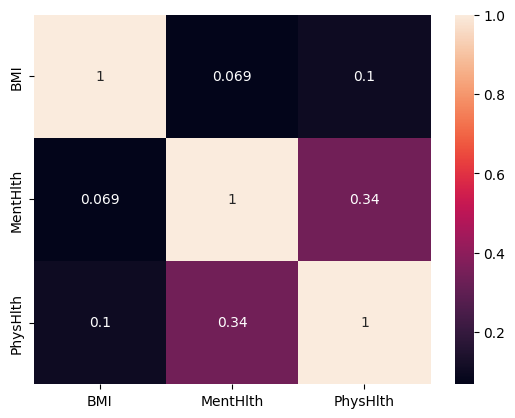

In [20]:
sns.heatmap(cor,annot=True)
plt.show()

From the above correlation matrix it is found that variables have a correlation coefficient that is close to 0, it indicates a weak or no correlation between the variables. This means that there is no consistent relationship between these variables.

## Skewness

In [21]:
df.skew()

Diabetes               1.825616
HighBP                 0.182997
HighChol               0.234559
CholCheck             -4.664269
BMI                    2.063938
Smoker                 0.137683
Stroke                 4.403481
Cardiac_Event          2.608378
PhysActivity          -1.055421
Fruits                -0.463862
Veggies               -1.460067
High_Alcohol_intake    3.679207
AnyHealthcare         -3.949859
NoDocbcCost            2.806616
GenHlth                0.352020
MentHlth               2.546808
PhysHlth               2.046245
DiffWalk               1.618154
Gender                 0.244892
Age                   -0.385147
Education             -0.691196
Income                -0.781619
dtype: float64

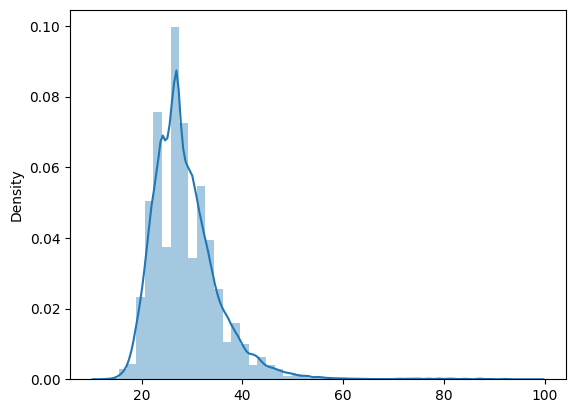

BMI shows Highly Positive Skew 2.063938014894699


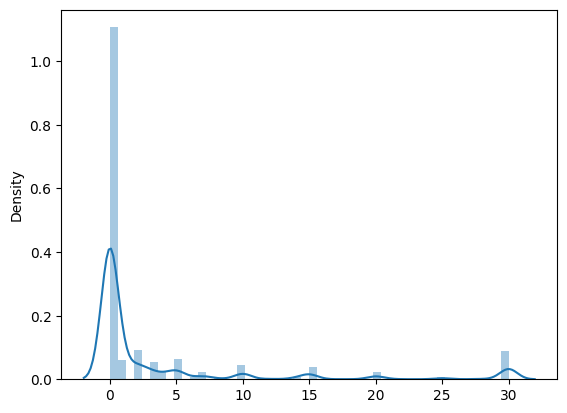

MentHlth shows Highly Positive Skew 2.5468080441762835


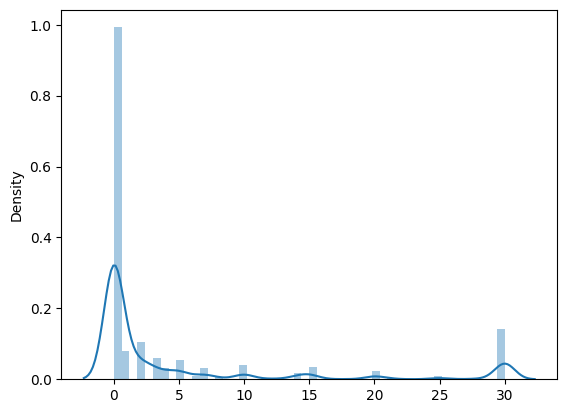

PhysHlth shows Highly Positive Skew 2.0462446525942104


In [22]:
#Visualisation of skewness
for i in df.select_dtypes(exclude = 'object').columns:
    sns.distplot(x = df[i])
    plt.show()
    if df[i].skew() < 0.5 and df[i].skew() > -0.5:
        print(i, 'shows Fairly Symettrical Skew - ', df[i].skew())
    elif df[i].skew() > 0.5 and df[i].skew() < 1:
        print(i, 'shows Moderatly Positive Skew', df[i].skew())
    elif df[i].skew() < -0.5 and df[i].skew() > -1:
        print(i, ' shows Moderatly Negative Skew', df[i].skew())
    elif df[i].skew() < -1:
        print(i,'shows Highly Negative Skew', df[i].skew())
    elif df[i].skew() > 1:
        print(i, 'shows Highly Positive Skew', df[i].skew())

A highly positive skewness value indicates that the tail of the distribution is much longer on the positive side. It may be appropriate to transform the data to make the distribution more normal and improve the accuracy of statistical tests. Above skewed data is transformed using Log Transformation and BOX-COX transformation. 

In [9]:
#applying log transformation for BMI column because it contains only positive values.
x = df['BMI']

# apply the log transformation to x
df['BMI'] = np.log(x)

In [10]:
print("skewness of BMI is ",df['BMI'].skew())

skewness of BMI is  0.6375339497416975


In [11]:
from scipy.stats import boxcox_normmax, boxcox

In [12]:

# Apply the Box-Cox transformation to all numeric columns with more zero values
data_transformed = pd.DataFrame()
for column in df.select_dtypes(include=[np.number]):
    if (df[column] == 0).sum() > 10:
        transformed_column, _ = boxcox(df[column] + 1)
        data_transformed[column] = transformed_column
    else:
        data_transformed[column] = df[column]

# Print the first few rows of the transformed data
print(data_transformed.head())

        BMI  MentHlth  PhysHlth
0  3.688879  0.871245  1.114372
1  3.218876  0.000000  0.000000
2  3.332205  0.885936  1.170328
3  3.295837  0.000000  0.000000
4  3.178054  0.710047  0.000000


In [13]:
data_transformed.skew()

BMI         0.637534
MentHlth    0.810007
PhysHlth    0.602579
dtype: float64

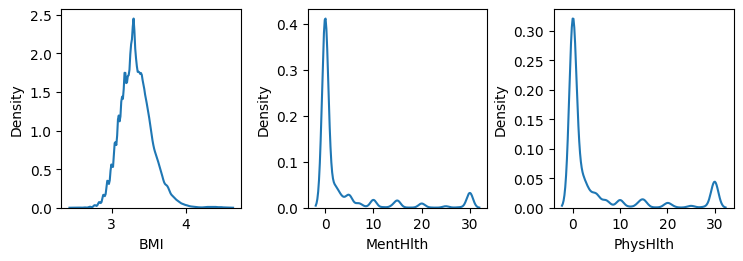

In [28]:
plt.figure(figsize=[10,10])
nrows = 4
ncols = 4
iterator= 1
for i in num:
    plt.subplot(nrows,ncols,iterator)
    sns.kdeplot(df[i])
    iterator+=1
plt.tight_layout()
plt.show()

In [14]:
df[['BMI', 'MentHlth', 'PhysHlth']]=pd.DataFrame(data_transformed)

The Skewness in the numeric variables is transformed and the skewness is almost symmeyric . The transformed data are added to the main dataframe.

## Variance Inflation Factor (VIF): To measure the multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [31]:
x=data.drop("Diabetes_012",axis=1)


In [32]:
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns


In [33]:
vif

,VIF Factor,features
0,2.352477,HighBP
1,2.067413,HighChol
2,21.486475,CholCheck
3,17.353572,BMI
4,1.985280,Smoker
5,1.127985,Stroke
6,1.296400,HeartDiseaseorAttack
7,4.142290,PhysActivity
8,2.828307,Fruits
9,5.286779,Veggies


In [34]:
x1=x.drop("Education",axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,2.339836,HighBP
1,2.066926,HighChol
2,20.641052,CholCheck
3,16.653405,BMI
4,1.981863,Smoker
5,1.127963,Stroke
6,1.295618,HeartDiseaseorAttack
7,4.035200,PhysActivity
8,2.816015,Fruits
9,5.207173,Veggies


In [35]:
x1=x1.drop("CholCheck",axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,2.339836,HighBP
1,2.065445,HighChol
2,15.322958,BMI
3,1.980133,Smoker
4,1.127937,Stroke
5,1.295135,HeartDiseaseorAttack
6,3.976267,PhysActivity
7,2.808024,Fruits
8,5.179542,Veggies
9,1.090155,HvyAlcoholConsump


In [36]:
x1=x1.drop("AnyHealthcare",axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,2.336001,HighBP
1,2.065444,HighChol
2,13.962187,BMI
3,1.977964,Smoker
4,1.127819,Stroke
5,1.294388,HeartDiseaseorAttack
6,3.898003,PhysActivity
7,2.803378,Fruits
8,5.145905,Veggies
9,1.089999,HvyAlcoholConsump


In [15]:
df.drop(['AnyHealthcare','CholCheck','Education'],1,inplace=True)

In [38]:
df.head(2)

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Cardiac_Event,PhysActivity,Fruits,Veggies,High_Alcohol_intake,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Income
0,0.0,1.0,1.0,3.688879,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.871245,1.114372,1.0,0.0,9.0,3.0
1,0.0,0.0,0.0,3.218876,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,7.0,1.0


In [16]:
df.shape

(229781, 19)

After removing cholcheck, anyhealthcare and education columns, VIF has reduced to an acceptable level.
Removing columns education and anyhealthcare is acceptable as they are not directly related to diabetic prediction.
Cholcheck can also be removed based on the conclusion that only if a person has checked they will have high colestrol and a column already exists for denoting the same.

# Visualisation

Box-Plot

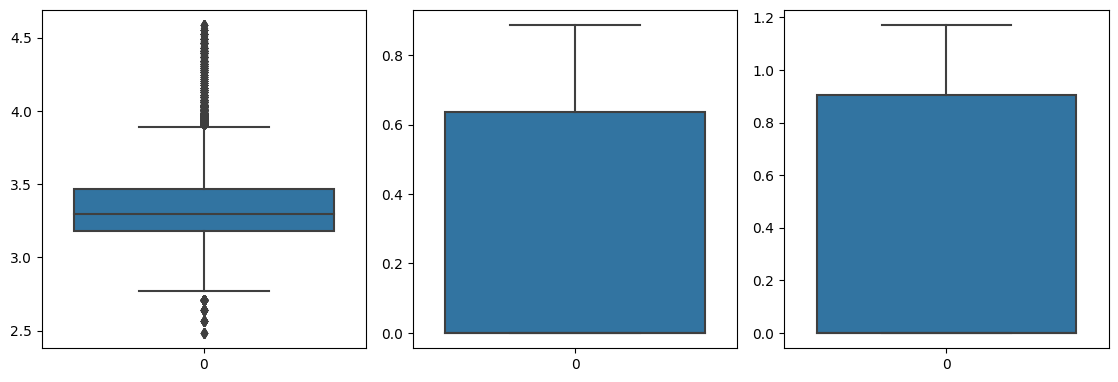

In [40]:
#applying BOx plot for the numerical variables for the detection of outliers.
plt.figure(figsize=[15,15])
nrows = 4
ncols = 4
iterator= 1
for i in num:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df[i])
    iterator+=1
plt.tight_layout()
plt.show()
    

we are not removing the outliers as they are relevent to the model building and prediction of the target variable

Histogram

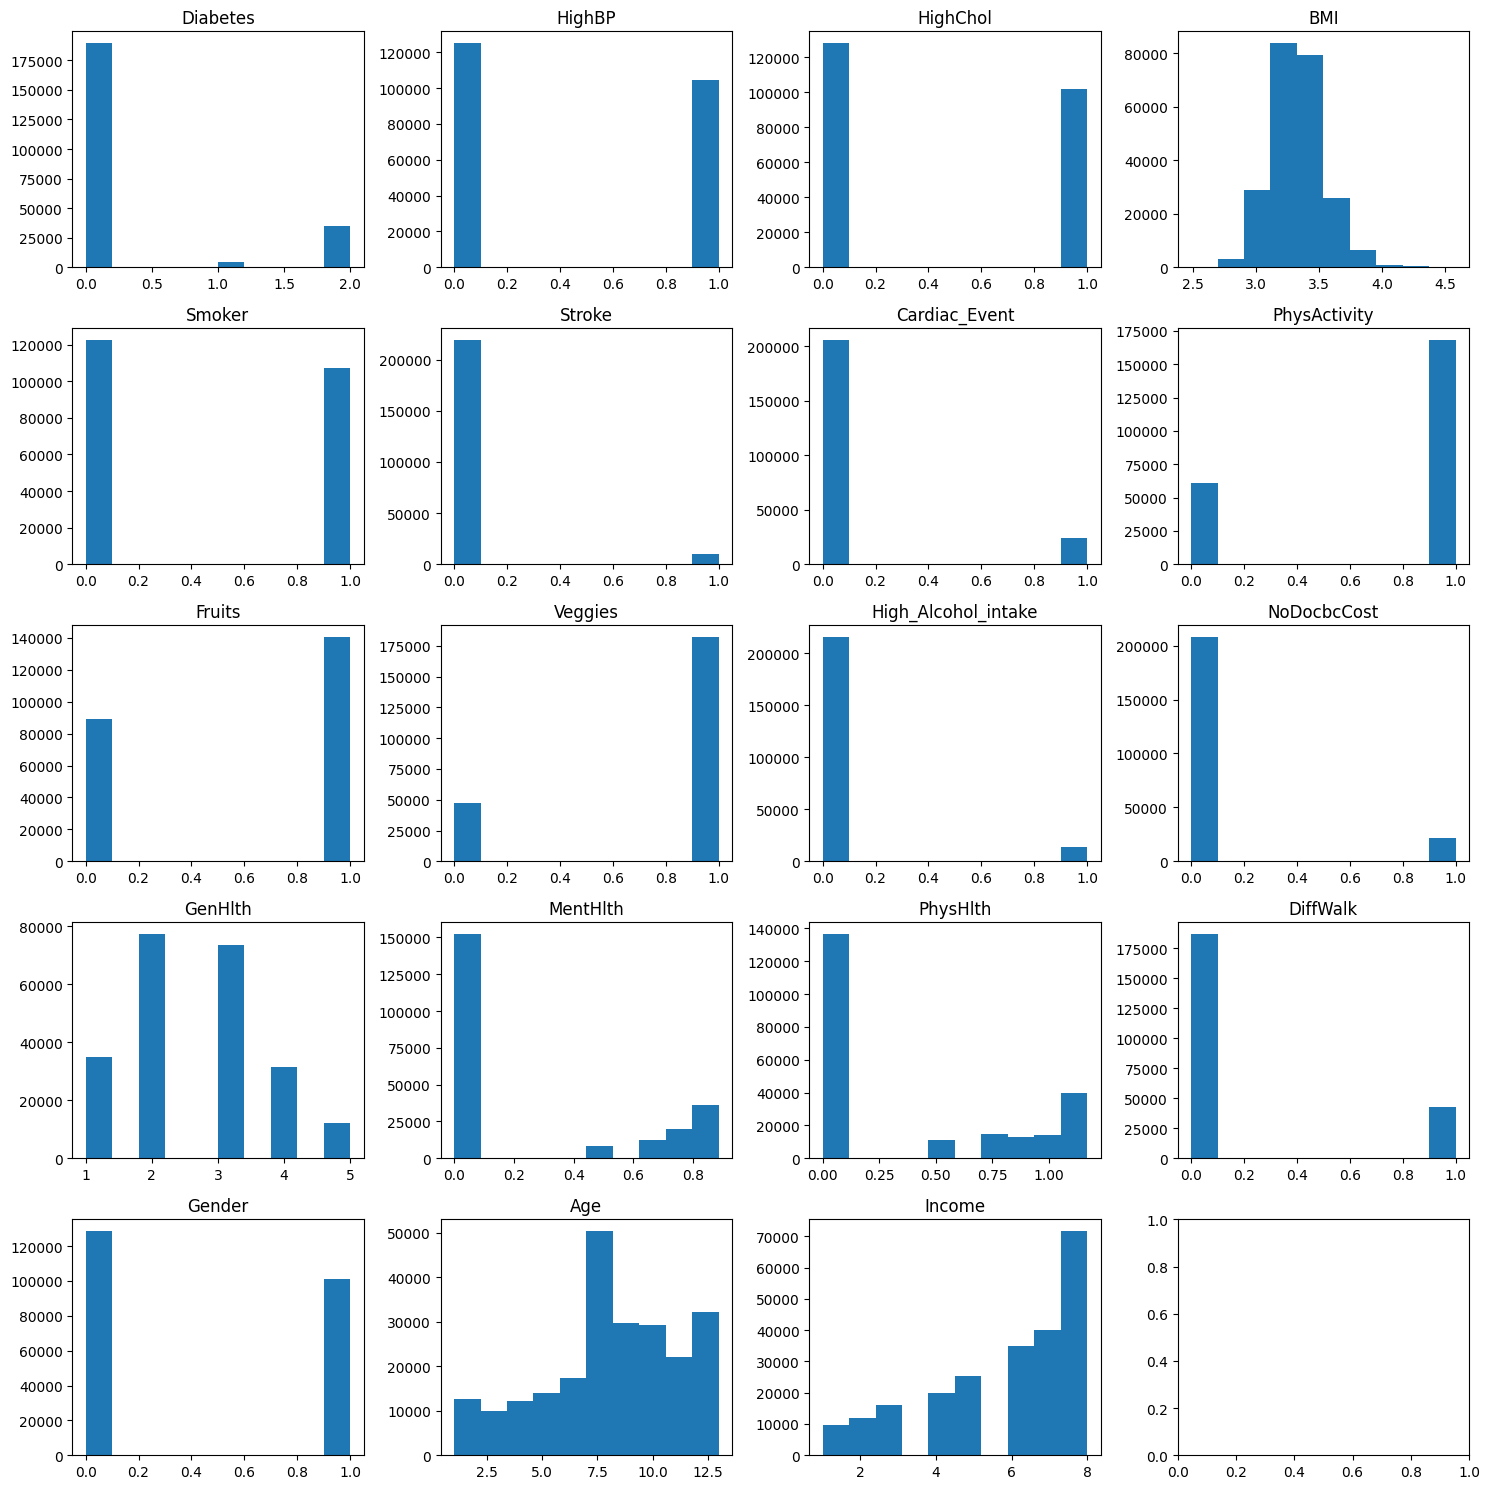

In [41]:
# subplots
fig, axs = plt.subplots(5, 4, figsize=(15, 15))
axs = axs.ravel()  # Flatten the array of subplots

#create a histogram for all the variables
for i, column in enumerate(df.columns):
    axs[i].hist(df[column])
    axs[i].set_title(column)

plt.tight_layout()  
plt.show() 

The above histogram plot shows the graphical representation of the distribution of the variables.The height of each vertical bar corresponds to the frequency or proportion of the data values that fall within a specific interval.

Countplot

In [42]:
cat=df.select_dtypes(include="object").columns

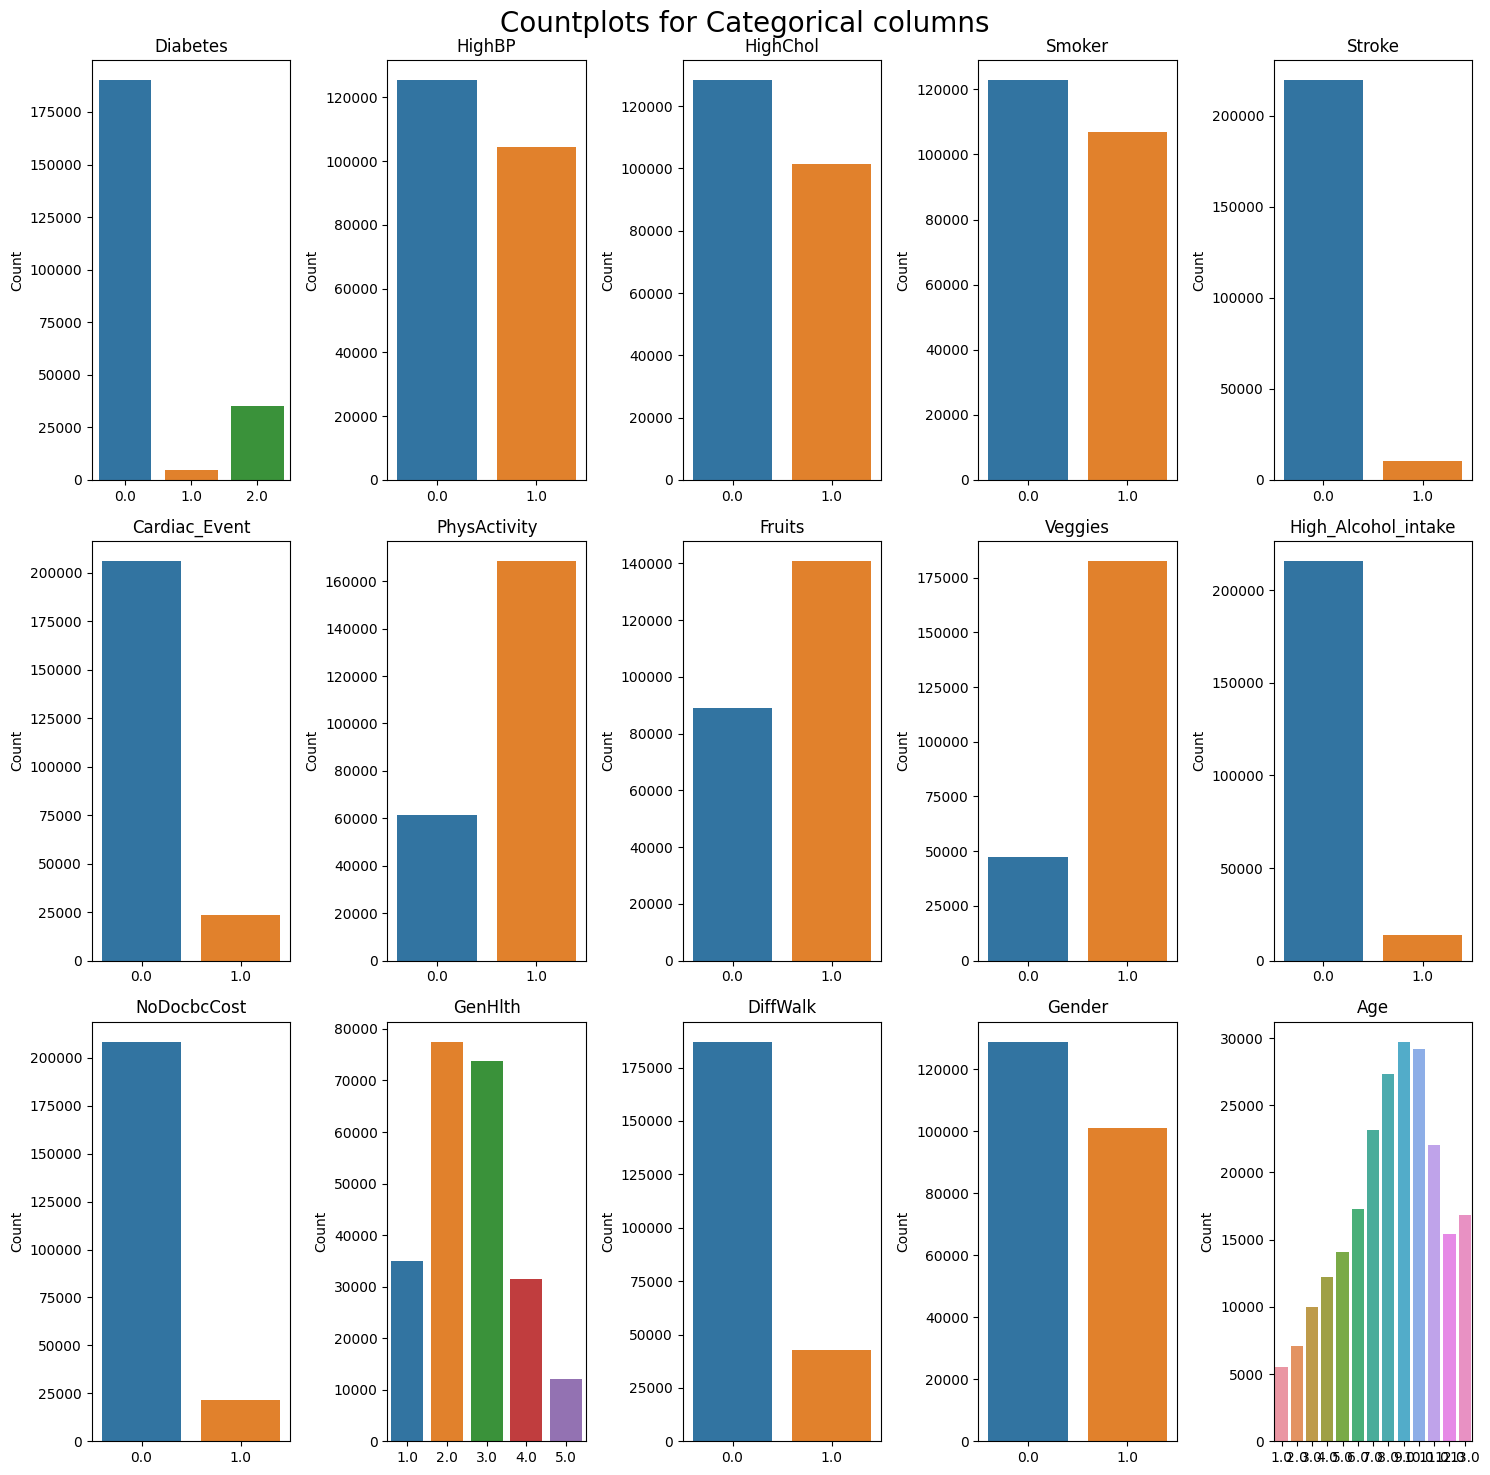

In [43]:
# Create a grid of subplots with 5 rows and 5 columns
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 15))

# Set up a loop to create a countplot for each object-type column
for ax, col in zip(axes.flatten(), cat):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)

# Set the title for the plot
fig.suptitle("Countplots for Categorical columns", fontsize=20)

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()






The above countplot is a visualization that displays the counts of observations in each category of a categorical variable as bars. 

by analysing the countplot the areas where the data is denser and less concentrated can be identified easily.
the categorical columns stroke,cardiac_event,High_alcohol_intake,Nobccost depicts large gap in the density of the data.

BarPlot

In [44]:
cat=df.select_dtypes(include=['object'])

In [ ]:
plt.figure(figsize=[15,15])
nrows = 4
ncols = 5
iterator= 1
for i in df.drop("Diabetes",axis=1):
    plt.subplot(nrows,ncols,iterator)
    sns.barplot(x=df["Diabetes"],y=df[i])
    iterator+=1
fig.suptitle("Barplot for Diabetes VS Other Categorical Coloumn", fontsize=20)
plt.tight_layout()
plt.show()

The above Bar plot of  Diabetes VS other Categorical Columns, visualization the counts or frequencies of categorical data as rectangular bars with lengths proportional to the values that they represent. 

these plots help in analysing difference in the count of diabetic and non diabetic people in different categories

## Checking for Data Imbalance

In [ ]:
#checking if the target column is balanced or not

Target=df["Diabetes"].value_counts(normalize=True)*100
Target

In [ ]:
Target.plot(kind = 'bar')
plt.title('Value counts of the target variable')
plt.xlabel('Diabetes Type')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.show()

As we can see the target column is slightly imbalanced because more than 82% of the people belongs to the non-diabetic category,only 15% is prediabetic and 2% are diabetic . Because of the imbalance in the target column , Prediabetic and Diabetic is combined together as Diabetes.

In [17]:
# replace values in the 'Diabetes' column
df['Diabetes'] = df['Diabetes'].replace([2.0, 1.0], 1.0)

In [18]:
#value count
df["Diabetes"].value_counts(normalize=True)*100

0.0    82.711364
1.0    17.288636
Name: Diabetes, dtype: float64

#Statistical Analysis 

In [ ]:
import scipy.stats as stats



*   h0:the variables are independent
*   h1: the variables are not independent




In [ ]:
for i in cat:
  obs=pd.crosstab(df[i],df["Diabetes"])
  statistics,pval,dof,exp_freq=stats.chi2_contingency(obs)
  print(i,pval)



*   pvalue=0
*   sig_lvl=0.05
*  pval<sig_lvl
*   null hypothesis rejected and alternate hypothesis selected
*   the variables are not independent






# Train-Test Split

In [19]:
#separating the independent variables and the target column as x and y
#predictor variables
x=df.drop("Diabetes",axis=1)
#Target column
y=df["Diabetes"]
#converting the Dtypes of all the 'object' to "float"
x=x.astype(np.float64)
y=y.astype(np.float64)

In [20]:
#splitting the data into train and test (70:30)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=100)

# Scaling

In [ ]:
num

In [21]:
#scaling the independent variables
sc=StandardScaler()
xtrain_sc=xtrain.copy(deep=True)
xtest_sc=xtest.copy(deep=True)
xtrain_sc[num]=sc.fit_transform(xtrain_sc[num])
xtest_sc[num]=sc.transform(xtest_sc[num])


Using Standard Scaler the numerical values in the Xtrain and Xtrain were Scaled between the range of -3 to 3

Testing the split of the data(distribution)

*   Ho:means of two independent populations are equal
*  H1:means of two independent populations are  not equal



In [ ]:
stats.ttest_ind(xtrain,xtest)

In [ ]:
stats.ttest_ind(ytrain,ytest)

*   pvalue=0.99,
*   sig_lvl=0.05,
*   pval>sig_lvl
*  failed to reject null hypothesis
*  means of two inependent populations are equal














#Model Building

In [22]:
#creating a Dataframe to store the results
ind=["Logit_Regression","Logistic Regression","Logistic Regression(balanced class weight)","Decision Tree Classifier","Random Forest classifier","KN Neighbors","Naive Bayes","XG Boost Classifier","LG Boost Classifier"]
col=["Accuracy score","Precision","Recall","F1_score"]
scores=pd.DataFrame(index=ind,columns=col)
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN
Logistic Regression(balanced class weight),NaN,NaN,NaN,NaN
Decision Tree Classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


In [23]:
xtrain_sc_c = sm.add_constant(xtrain_sc)
xtest_sc_c = sm.add_constant(xtest_sc)

In [24]:
logreg = sm.Logit(ytrain,xtrain_sc_c).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.372159
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Diabetes   No. Observations:               160846
Model:                          Logit   Df Residuals:                   160827
Method:                           MLE   Df Model:                           18
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1917
Time:                        04:42:03   Log-Likelihood:                -59860.
converged:                       True   LL-Null:                       -74059.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.6542      0.051    -90.729      0.000      -4.755      -4.554
HighBP                  0.6749      0.017     40.566      0.000       0.642       0.708
HighChol                0.5892      0.016     38.003      0.000       0.559       0.620
BMI                     0.4846      0.008     63.250      0.000       0.470       0.500
Smoker                 -0.0157      0.015     -1.039      0.299      -0.045       0.014
Stroke                  0.1373      0.029      4.674      0.000       0.080       0.195
Cardiac_Event           0.2116      0.021     10.212      0.000       0.171       0.252
PhysActivity           -0.0220      0.016     -1.342      0.179      -0.054       0.010
Fruits                 -0.0209      0.016     -1.333      0.182      -0.052       0.010
Veggies                -0.0284      0.018     -1.567      0.117      -0.064       0.007
High_Alcohol_intake    -0.7033      0.042    -16.861      0.000      -0.785      -0.622
NoDocbcCost             0.0230      0.026      0.902      0.367      -0.027       0.073
GenHlth                 0.4833      0.009     53.469      0.000       0.466       0.501
MentHlth               -0.0421      0.008     -5.270      0.000      -0.058      -0.026
PhysHlth               -0.0326      0.008     -3.851      0.000      -0.049      -0.016
DiffWalk                0.0707      0.019      3.645      0.000       0.033       0.109
Gender                  0.2116      0.016     13.651      0.000       0.181       0.242
Age                     0.1303      0.003     40.973      0.000       0.124       0.137
Income                 -0.0513      0.004    -13.633      0.000      -0.059      -0.044
=======================================================================================
"""

In [25]:
logreg_pred = logreg.predict(xtest_sc_c)
logreg_pred

126799    0.242432
148679    0.700501
41135     0.080203
227747    0.083042
163959    0.024281
            ...   
167696    0.080615
250205    0.056217
156354    0.019179
64312     0.037245
23101     0.301819
Length: 68935, dtype: float64

In [26]:
y_pred = [ 0 if x < 0.5 else 1 for x in logreg_pred]

In [27]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57017
         1.0       0.55      0.19      0.28     11918

    accuracy                           0.83     68935
   macro avg       0.70      0.58      0.59     68935
weighted avg       0.80      0.83      0.80     68935



In [28]:
l=[accuracy_score(ytest,y_pred),precision_score(ytest,y_pred),recall_score(ytest,y_pred),f1_score(ytest,y_pred)]
scores.loc["Logit_Regression"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,NaN,NaN,NaN,NaN
Logistic Regression(balanced class weight),NaN,NaN,NaN,NaN
Decision Tree Classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


# logistic regression using Sklearn

In [29]:
# logistic regression using Sklearn
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(xtrain_sc, ytrain)

# Make predictions on the test data
y_pred_lr =lr.predict(xtest_sc)


In [30]:
print(classification_report(ytest, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57017
         1.0       0.55      0.19      0.28     11918

    accuracy                           0.83     68935
   macro avg       0.70      0.58      0.59     68935
weighted avg       0.80      0.83      0.80     68935



due to the imbalance in the data,there is a large gap between precision, recall and f1score of 2 classes.
also precision and recall values has to be almost equal for a good model.here those  values show huge difference.

In [31]:
l=[accuracy_score(ytest,y_pred_lr),precision_score(ytest,y_pred_lr),recall_score(ytest,y_pred_lr),f1_score(ytest,y_pred_lr)]
scores.loc["Logistic Regression"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),NaN,NaN,NaN,NaN
Decision Tree Classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


ROC-AUC curve

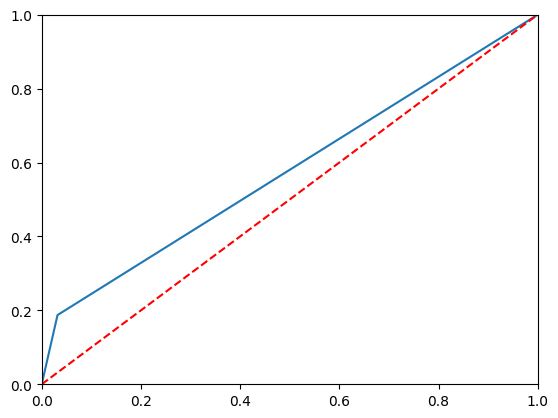

In [32]:
fpr, tpr , threshold = roc_curve(ytest,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

# LOGISTIC REGRESSION MODEL WITH BALANCED CLASS WEIGHT

In [33]:
# logistic regression using Sklearn
lr = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
lr.fit(xtrain_sc, ytrain)

# Make predictions on the test data
y_pred_bal =lr.predict(xtest_sc)
print(classification_report(ytest, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     57017
         1.0       0.35      0.74      0.48     11918

    accuracy                           0.72     68935
   macro avg       0.64      0.73      0.64     68935
weighted avg       0.83      0.72      0.75     68935



### #even though we get get a more balanced and better value for recall , the imbalance among  precision and f1score between 2 different classes still exists

In [34]:
l=[accuracy_score(ytest,y_pred_bal),precision_score(ytest,y_pred_bal),recall_score(ytest,y_pred_bal),f1_score(ytest,y_pred_bal)]
scores.loc["Logistic Regression(balanced class weight)"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


#Decision tree

In [35]:
dt=DecisionTreeClassifier()
ypred_dt=dt.fit(xtrain_sc,ytrain).predict(xtest_sc)
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     57017
         1.0       0.31      0.33      0.32     11918

    accuracy                           0.76     68935
   macro avg       0.58      0.59      0.59     68935
weighted avg       0.76      0.76      0.76     68935



In [36]:
l=[accuracy_score(ytest,y_pred_bal),precision_score(ytest,y_pred_bal),recall_score(ytest,y_pred_bal),f1_score(ytest,y_pred_bal)]
scores.loc["Decision Tree Classifier"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


#KNN

In [37]:
kn=KNeighborsClassifier()
ypred_kn=kn.fit(xtrain_sc,ytrain).predict(xtest_sc)
print(classification_report(ytest,ypred_kn))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89     57017
         1.0       0.43      0.24      0.30     11918

    accuracy                           0.81     68935
   macro avg       0.64      0.58      0.60     68935
weighted avg       0.78      0.81      0.79     68935



In [38]:
l=[accuracy_score(ytest,ypred_kn),precision_score(ytest,ypred_kn),recall_score(ytest,ypred_kn),f1_score(ytest,ypred_kn)]
scores.loc["KN Neighbors"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,0.81307,0.4266,0.23603,0.303911
Naive Bayes,NaN,NaN,NaN,NaN
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


#Naive Bayes

In [42]:
gnb=GaussianNB()
y_pred_gnb=gnb.fit(xtrain_sc,ytrain).predict(xtest_sc)

In [43]:
print(classification_report(ytest, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86     57017
         1.0       0.38      0.49      0.43     11918

    accuracy                           0.77     68935
   macro avg       0.63      0.66      0.64     68935
weighted avg       0.80      0.77      0.78     68935



In [44]:
l=[accuracy_score(ytest,y_pred_gnb),precision_score(ytest,y_pred_gnb),recall_score(ytest,y_pred_gnb),f1_score(ytest,y_pred_gnb)]
scores.loc["Naive Bayes"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,NaN,NaN,NaN,NaN
KN Neighbors,0.81307,0.4266,0.23603,0.303911
Naive Bayes,0.77032,0.375406,0.494882,0.426943
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


#Randomforest

In [45]:
rfc=RandomForestClassifier()
ypred_rfc=rfc.fit(xtrain_sc,ytrain).predict(xtest_sc)
print(classification_report(ytest, ypred_rfc))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     57017
         1.0       0.47      0.22      0.30     11918

    accuracy                           0.82     68935
   macro avg       0.66      0.58      0.60     68935
weighted avg       0.79      0.82      0.79     68935



In [46]:
l=[accuracy_score(ytest,ypred_rfc),precision_score(ytest,ypred_rfc),recall_score(ytest,ypred_rfc),f1_score(ytest,ypred_rfc)]
scores.loc["Random Forest classifier"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,0.822035,0.468525,0.218577,0.298089
KN Neighbors,0.81307,0.4266,0.23603,0.303911
Naive Bayes,0.77032,0.375406,0.494882,0.426943
XG Boost Classifier,NaN,NaN,NaN,NaN
LG Boost Classifier,NaN,NaN,NaN,NaN


#XGB Classification

In [47]:
xgb = XGBClassifier()
xgb_model = xgb.fit(xtrain_sc,ytrain)
ypred_xgb = xgb_model.predict(xtest_sc)
print('Test report : \n',classification_report(ytest,ypred_xgb))

Test report : 
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57017
         1.0       0.55      0.20      0.30     11918

    accuracy                           0.83     68935
   macro avg       0.70      0.59      0.60     68935
weighted avg       0.80      0.83      0.80     68935



In [48]:
l=[accuracy_score(ytest,ypred_xgb),precision_score(ytest,ypred_xgb),recall_score(ytest,ypred_xgb),f1_score(ytest,ypred_xgb)]
scores.loc["XG Boost Classifier"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,0.822035,0.468525,0.218577,0.298089
KN Neighbors,0.81307,0.4266,0.23603,0.303911
Naive Bayes,0.77032,0.375406,0.494882,0.426943
XG Boost Classifier,0.834105,0.554848,0.204565,0.298921
LG Boost Classifier,NaN,NaN,NaN,NaN


#LGB classification

In [49]:
clf = lgb.LGBMClassifier()
clf.fit(xtrain_sc, ytrain)
ypred_lgb=clf.predict(xtest_sc)
print('Test report : \n',classification_report(ytest,ypred_lgb))

Test report : 
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     57017
         1.0       0.57      0.20      0.30     11918

    accuracy                           0.84     68935
   macro avg       0.71      0.58      0.60     68935
weighted avg       0.80      0.84      0.80     68935



In [50]:
l=[accuracy_score(ytest,ypred_lgb),precision_score(ytest,ypred_lgb),recall_score(ytest,ypred_lgb),f1_score(ytest,ypred_lgb)]
scores.loc["LG Boost Classifier"]=l
scores

,Accuracy score,Precision,Recall,F1_score
Logit_Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression,0.833147,0.551383,0.18728,0.279594
Logistic Regression(balanced class weight),0.7174,0.35054,0.744168,0.476585
Decision Tree Classifier,0.7174,0.35054,0.744168,0.476585
Random Forest classifier,0.822035,0.468525,0.218577,0.298089
KN Neighbors,0.81307,0.4266,0.23603,0.303911
Naive Bayes,0.77032,0.375406,0.494882,0.426943
XG Boost Classifier,0.834105,0.554848,0.204565,0.298921
LG Boost Classifier,0.835831,0.572288,0.199614,0.295988


# TREATING IMBALANCE IN THE TARGET VARIABLE

In [51]:
#creating a Dataframe to store the results
ind=["Logistic_undersampling","Logistic_oversampling","Logistic_smote","XGB_undersampling","XGB_oversampling","XGB_smote","LGB_undersampling","LGB_oversampling","LGB_smote"]
col=["Accuracy score","Precision_score","Recall_score","F1_score"]
scores_sampling=pd.DataFrame(index=ind,columns=col)
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,NaN,NaN,NaN,NaN
Logistic_oversampling,NaN,NaN,NaN,NaN
Logistic_smote,NaN,NaN,NaN,NaN
XGB_undersampling,NaN,NaN,NaN,NaN
XGB_oversampling,NaN,NaN,NaN,NaN
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


In [103]:
#creating a dataframe to store the result of smote
ind=["Logistic Regression","Decision tree classifier","Random Forest classifier","KNN","Support Vector Machine","Naive Bayes","Ada Boost","XG Boost","LG Boost"]
col=["Accuracy score","Precision","Recall","F1_score"]
scores_smote=pd.DataFrame(index=ind,columns=col)
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,NaN,NaN,NaN,NaN
Decision tree classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,NaN,NaN,NaN,NaN
LG Boost,NaN,NaN,NaN,NaN


# Undersampling

In [52]:
rus=RandomUnderSampler(random_state=123,replacement=True)
x_rus,y_rus=rus.fit_resample(x,y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0.0: 190055, 1.0: 39726})
Resample dataset shape Counter({0.0: 39726, 1.0: 39726})


In [53]:
#splitting the undersampld data
xtrain_under,xtest_under,ytrain_under,ytest_under=train_test_split(x_rus,y_rus,test_size=0.3,stratify=y_rus,random_state=120)


In [54]:
#scaling the independent variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_under_sc=xtrain_under.copy(deep=True)
xtest_under_sc=xtest_under.copy(deep=True)
xtrain_under_sc[num]=sc.fit_transform(xtrain_under_sc[num])
xtest_under_sc[num]=sc.transform(xtest_under_sc[num])


In [55]:
# logistic regression using Sklearn
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(xtrain_under_sc, ytrain_under)

# Make predictions on the test data
ypred_under =lr.predict(xtest_under_sc)

In [56]:
print(classification_report(ytest_under,ypred_under))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     11918
         1.0       0.72      0.75      0.73     11918

    accuracy                           0.73     23836
   macro avg       0.73      0.73      0.73     23836
weighted avg       0.73      0.73      0.73     23836



In [57]:
l=[accuracy_score(ytest_under,ypred_under),precision_score(ytest_under,ypred_under),recall_score(ytest_under,ypred_under),f1_score(ytest_under,ypred_under)]
scores_sampling.loc["Logistic_undersampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,NaN,NaN,NaN,NaN
Logistic_smote,NaN,NaN,NaN,NaN
XGB_undersampling,NaN,NaN,NaN,NaN
XGB_oversampling,NaN,NaN,NaN,NaN
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


#oversampling

In [58]:
ros=RandomOverSampler(random_state=123)
x_ros,y_ros=ros.fit_resample(x,y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 190055, 1.0: 39726})
Resample dataset shape Counter({0.0: 190055, 1.0: 190055})


In [59]:
xtrain_over,xtest_over,ytrain_over,ytest_over=train_test_split(x_ros,y_ros,test_size=0.3,stratify=y_ros,random_state=120)


In [60]:
#scaling the independent variables
sc=StandardScaler()
xtrain_over_sc=xtrain_over.copy(deep=True)
xtest_over_sc=xtest_over.copy(deep=True)
xtrain_over_sc[num]=sc.fit_transform(xtrain_over_sc[num])
xtest_over_sc[num]=sc.transform(xtest_over_sc[num])

In [61]:
# logistic regression using Sklearn
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(xtrain_over_sc, ytrain_over)

# Make predictions on the test data
ypred_over =lr.predict(xtest_over_sc)

In [62]:
print(classification_report(ytest_over,ypred_over))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     57016
         1.0       0.72      0.75      0.73     57017

    accuracy                           0.73    114033
   macro avg       0.73      0.73      0.73    114033
weighted avg       0.73      0.73      0.73    114033



In [63]:
l=[accuracy_score(ytest_over,ypred_over),precision_score(ytest_over,ypred_over),recall_score(ytest_over,ypred_over),f1_score(ytest_over,ypred_over)]
scores_sampling.loc["Logistic_oversampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,NaN,NaN,NaN,NaN
XGB_undersampling,NaN,NaN,NaN,NaN
XGB_oversampling,NaN,NaN,NaN,NaN
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


SMOTE

In [64]:
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote=smote.fit_resample(x,y)


In [65]:
 print('Original dataset shape', Counter(y))
 print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 190055, 1.0: 39726})
Resample dataset shape Counter({0.0: 190055, 1.0: 190055})


In [66]:
#splitting the data into train and test (70:30)
xtrain_smote,xtest_smote,ytrain_smote,ytest_smote=train_test_split(x_smote,y_smote,test_size=0.3,stratify=y_smote,random_state=121)

In [67]:
#scaling the independent variables
sc=StandardScaler()
xtrain_smote_sc=xtrain_smote.copy(deep=True)
xtest_smote_sc=xtest_smote.copy(deep=True)
xtrain_smote_sc[num]=sc.fit_transform(xtrain_smote_sc[num])
xtest_smote_sc[num]=sc.transform(xtest_smote_sc[num])

In [68]:
# logistic regression using Sklearn
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(xtrain_smote_sc, ytrain_smote)

# Make predictions on the test data
ypred_smote_lr =lr.predict(xtest_smote_sc)

print(classification_report(ytest_smote,ypred_smote_lr))


              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     57017
         1.0       0.72      0.76      0.74     57016

    accuracy                           0.74    114033
   macro avg       0.74      0.74      0.74    114033
weighted avg       0.74      0.74      0.74    114033



In [69]:
l=[accuracy_score(ytest_smote,ypred_smote_lr),precision_score(ytest_smote,ypred_smote_lr),recall_score(ytest_smote,ypred_smote_lr),f1_score(ytest_smote,ypred_smote_lr)]
scores_sampling.loc["Logistic_smote"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,NaN,NaN,NaN,NaN
XGB_oversampling,NaN,NaN,NaN,NaN
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


In [104]:
l=[accuracy_score(ytest_smote,ypred_smote_lr),precision_score(ytest_smote,ypred_smote_lr),recall_score(ytest_smote,ypred_smote_lr),f1_score(ytest_smote,ypred_smote_lr)]
scores_smote.loc["Logistic Regression"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,NaN,NaN,NaN,NaN
LG Boost,NaN,NaN,NaN,NaN


# XGB MODEL

In [70]:
#xgb on the oversampled data
xgb1= XGBClassifier()
xgb1_model = xgb1.fit(xtrain_over_sc,ytrain_over)
ypred_over_xgb1 = xgb1_model.predict(xtest_over_sc)
print('Test report : \n',classification_report(ytest_over,ypred_over_xgb1))

Test report : 
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     57016
         1.0       0.73      0.79      0.76     57017

    accuracy                           0.75    114033
   macro avg       0.75      0.75      0.74    114033
weighted avg       0.75      0.75      0.74    114033



XGB - Undersampling

In [71]:
#xgb on the undersampled data
xgb2= XGBClassifier()
xgb2_model = xgb2.fit(xtrain_under_sc,ytrain_under)
ypred_under_xgb2 = xgb2_model.predict(xtest_under_sc)
print('Test report : \n',classification_report(ytest_under,ypred_under_xgb2))

Test report : 
               precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     11918
         1.0       0.71      0.77      0.74     11918

    accuracy                           0.73     23836
   macro avg       0.73      0.73      0.73     23836
weighted avg       0.73      0.73      0.73     23836



XGB model after hyperparameter tuning - Oversampling

In [ ]:
#xgb = XGBClassifier()
#params = {'gamma' : [0, 0.1, 0.5, 1],'learning_rate' : [0.01, 0.1, 1.0],'max_depth' : [3, 5, 7, 9]}
#grid = GridSearchCV(estimator=xgb,param_grid=params,cv=5)
#grid.fit(xtrain_over,ytrain_over)

In [ ]:
#grid.best_params_

OverSample

In [72]:
xgb_GS = XGBClassifier(max_depth = 9, gamma = 0,learning_rate=1.0)
xgb_GS_model = xgb_GS.fit(xtrain_over_sc,ytrain_over)
ypred_xgb_GS = xgb_GS_model.predict(xtest_over_sc)
print('Test report : \n',classification_report(ytest_over,ypred_xgb_GS))

Test report : 
               precision    recall  f1-score   support

         0.0       0.86      0.77      0.81     57016
         1.0       0.79      0.88      0.83     57017

    accuracy                           0.82    114033
   macro avg       0.83      0.82      0.82    114033
weighted avg       0.83      0.82      0.82    114033



In [73]:
l=[accuracy_score(ytest_over,ypred_xgb_GS),precision_score(ytest_over,ypred_xgb_GS),recall_score(ytest_over,ypred_xgb_GS),f1_score(ytest_over,ypred_xgb_GS)]
scores_sampling.loc["XGB_oversampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,NaN,NaN,NaN,NaN
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


Undersample

In [ ]:
#xgb = XGBClassifier()
#params = {'gamma' : [0, 0.1, 0.5, 1],'learning_rate' : [0.01, 0.1, 1.0],'max_depth' : [3, 5, 7, 9]}
#grid_ud = GridSearchCV(estimator=xgb,param_grid=params,cv=5)
#grid_ud.fit(xtrain_under,ytrain_under)

In [ ]:
#grid_ud.best_params_

In [74]:
#xgb on the undersampled data
xgb_GS_UD= XGBClassifier(max_depth = 5, gamma = 0.5, learning_rate = 0.1)
xgb_GS_UD_model = xgb_GS_UD.fit(xtrain_under_sc,ytrain_under)
ypred_xgb_GS_UD = xgb_GS_UD_model.predict(xtest_under_sc)
print('Test report : \n',classification_report(ytest_under,ypred_xgb_GS_UD))

Test report : 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72     11918
         1.0       0.71      0.78      0.75     11918

    accuracy                           0.73     23836
   macro avg       0.74      0.73      0.73     23836
weighted avg       0.74      0.73      0.73     23836



In [75]:
l=[accuracy_score(ytest_under,ypred_xgb_GS_UD),precision_score(ytest_under,ypred_xgb_GS_UD),recall_score(ytest_under,ypred_xgb_GS_UD),f1_score(ytest_under,ypred_xgb_GS_UD)]
scores_sampling.loc["XGB_undersampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,0.733932,0.714264,0.779829,0.745608
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,NaN,NaN,NaN,NaN
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


In [ ]:
#Grid SearchCV for Smote
#xgb = XGBClassifier()
#params = {'gamma' : [0, 0.1, 0.5, 1],'learning_rate' : [0.01, 0.1, 1.0],'max_depth' : [3, 5, 7, 9]}
#grid_sm = GridSearchCV(estimator=xgb,param_grid=params,cv=5)
#grid_sm.fit(xtrain_sc,ytrain)

In [ ]:
#grid_sm.best_params_

In [76]:
#xgb on the smote data
xgb_GS_SM= XGBClassifier(max_depth = 3, gamma = 0.1, learning_rate = 1.0)
xgb_GS_SM_model = xgb_GS_SM.fit(xtrain_smote_sc,ytrain_smote)
ypred_xgb_GS_SM = xgb_GS_SM_model.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_xgb_GS_SM))

Test report : 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     57017
         1.0       0.96      0.83      0.89     57016

    accuracy                           0.90    114033
   macro avg       0.90      0.90      0.90    114033
weighted avg       0.90      0.90      0.90    114033



In [77]:
l=[accuracy_score(ytest_smote,ypred_xgb_GS_SM),precision_score(ytest_smote,ypred_xgb_GS_SM),recall_score(ytest_smote,ypred_xgb_GS_SM),f1_score(ytest_smote,ypred_xgb_GS_SM)]
scores_sampling.loc["XGB_smote"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,0.733932,0.714264,0.779829,0.745608
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,0.896775,0.956568,0.831293,0.889542
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,NaN,NaN,NaN,NaN
LGB_smote,NaN,NaN,NaN,NaN


In [105]:
l=[accuracy_score(ytest_smote,ypred_xgb_GS_SM),precision_score(ytest_smote,ypred_xgb_GS_SM),recall_score(ytest_smote,ypred_xgb_GS_SM),f1_score(ytest_smote,ypred_xgb_GS_SM)]
scores_smote.loc["XG Boost"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,NaN,NaN,NaN,NaN


# LIGHTGBM MODEL

In [ ]:
#oversampling
clf = lgb.LGBMClassifier()
clf.fit(xtrain_over_sc, ytrain_over)

ypred_lgb=clf.predict(xtest_over)
print('Test report : \n',classification_report(ytest_over,ypred_lgb))

Test report : 
               precision    recall  f1-score   support

         0.0       0.85      0.44      0.58     57016
         1.0       0.62      0.92      0.74     57017

    accuracy                           0.68    114033
   macro avg       0.74      0.68      0.66    114033
weighted avg       0.74      0.68      0.66    114033



In [ ]:
#undersampling

In [ ]:

clf = lgb.LGBMClassifier()
clf.fit(xtrain_under_sc, ytrain_under)
ypred_lgb_UN=clf.predict(xtest_under_sc)
print('Test report : \n',classification_report(ytest_under,ypred_lgb_UN))

Test report : 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72     11918
         1.0       0.71      0.78      0.74     11918

    accuracy                           0.73     23836
   macro avg       0.74      0.73      0.73     23836
weighted avg       0.74      0.73      0.73     23836



In [ ]:
#SMOTE

In [ ]:

clf = lgb.LGBMClassifier()
clf.fit(xtrain_smote_sc, ytrain_smote)
ypred_lgb_SM=clf.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_lgb_SM))

Test report : 
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     57017
         1.0       0.94      0.84      0.89     57016

    accuracy                           0.89    114033
   macro avg       0.90      0.89      0.89    114033
weighted avg       0.90      0.89      0.89    114033



In [ ]:
#Hyperparameter tuning for Lightgbm oversampling
clf = lgb.LGBMClassifier()
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'n_estimators': [50, 100, 200]
}

# Perform grid search using 5-fold cross-validation
grid_search_OV = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid_search_OV.fit(xtrain_over_sc,ytrain_over)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127]})

In [ ]:
grid_search_OV.best_estimator_

LGBMClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, num_leaves=127)

In [83]:
#oversampling with best params
clf = lgb.LGBMClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, num_leaves=127)
clf.fit(xtrain_over_sc, ytrain_over)
ypred_lgb_GS_OV=clf.predict(xtest_over)
print('Test report : \n',classification_report(ytest_over,ypred_lgb_GS_OV))

Test report : 
               precision    recall  f1-score   support

         0.0       0.71      0.58      0.64     57016
         1.0       0.64      0.77      0.70     57017

    accuracy                           0.67    114033
   macro avg       0.68      0.67      0.67    114033
weighted avg       0.68      0.67      0.67    114033



In [84]:
l=[accuracy_score(ytest_over,ypred_lgb_GS_OV),precision_score(ytest_over,ypred_lgb_GS_OV),recall_score(ytest_over,ypred_lgb_GS_OV),f1_score(ytest_over,ypred_lgb_GS_OV)]
scores_sampling.loc["LGB_oversampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,0.733932,0.714264,0.779829,0.745608
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,0.896775,0.956568,0.831293,0.889542
LGB_undersampling,NaN,NaN,NaN,NaN
LGB_oversampling,0.672051,0.644235,0.76849,0.700898
LGB_smote,NaN,NaN,NaN,NaN


In [ ]:
#Hyperparameter tuning for Lightgbm undersampling
clf = lgb.LGBMClassifier()
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'n_estimators': [50, 100, 200]
}

# Perform grid search using 5-fold cross-validation
grid_search_UN = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid_search_UN.fit(xtrain_under_sc,ytrain_under)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127]})

In [ ]:
grid_search_UN.best_estimator_

LGBMClassifier(max_depth=3, n_estimators=200)

In [85]:
#undersampling with best params
clf = lgb.LGBMClassifier(max_depth=3, n_estimators=200)
clf.fit(xtrain_under_sc, ytrain_under)

ypred_lgb_GS_UN=clf.predict(xtest_under)
print('Test report : \n',classification_report(ytest_under,ypred_lgb_GS_UN))

Test report : 
               precision    recall  f1-score   support

         0.0       0.81      0.48      0.60     11918
         1.0       0.63      0.88      0.74     11918

    accuracy                           0.68     23836
   macro avg       0.72      0.68      0.67     23836
weighted avg       0.72      0.68      0.67     23836



In [86]:
l=[accuracy_score(ytest_under,ypred_lgb_GS_UN),precision_score(ytest_under,ypred_lgb_GS_UN),recall_score(ytest_under,ypred_lgb_GS_UN),f1_score(ytest_under,ypred_lgb_GS_UN)]
scores_sampling.loc["LGB_undersampling"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,0.733932,0.714264,0.779829,0.745608
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,0.896775,0.956568,0.831293,0.889542
LGB_undersampling,0.68321,0.630788,0.883621,0.736099
LGB_oversampling,0.672051,0.644235,0.76849,0.700898
LGB_smote,NaN,NaN,NaN,NaN


In [ ]:
#Hyperparameter tuning for Lightgbm Smote
clf = lgb.LGBMClassifier()
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'n_estimators': [50, 100, 200]
}

# Perform grid search using 5-fold cross-validation
grid_search_SM = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid_search_SM.fit(xtrain_sc,ytrain)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127]})

In [ ]:
grid_search_SM.best_estimator_

LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=50)

In [87]:
#Smote with best params
clf = lgb.LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=50)
clf.fit(xtrain_smote_sc, ytrain_smote)
ypred_lgb_GS_SM=clf.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_lgb_GS_SM))

Test report : 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     57017
         1.0       0.89      0.86      0.88     57016

    accuracy                           0.88    114033
   macro avg       0.88      0.88      0.88    114033
weighted avg       0.88      0.88      0.88    114033



In [88]:
l=[accuracy_score(ytest_smote,ypred_lgb_GS_SM),precision_score(ytest_smote,ypred_lgb_GS_SM),recall_score(ytest_smote,ypred_lgb_GS_SM),f1_score(ytest_smote,ypred_lgb_GS_SM)]
scores_sampling.loc["LGB_smote"]=l
scores_sampling

,Accuracy score,Precision_score,Recall_score,F1_score
Logistic_undersampling,0.72831,0.718941,0.749706,0.734001
Logistic_oversampling,0.726816,0.71851,0.74583,0.731915
Logistic_smote,0.735226,0.723909,0.760488,0.741748
XGB_undersampling,0.733932,0.714264,0.779829,0.745608
XGB_oversampling,0.823376,0.790618,0.879738,0.832801
XGB_smote,0.896775,0.956568,0.831293,0.889542
LGB_undersampling,0.68321,0.630788,0.883621,0.736099
LGB_oversampling,0.672051,0.644235,0.76849,0.700898
LGB_smote,0.87836,0.891779,0.861232,0.876239


In [106]:
l=[accuracy_score(ytest_smote,ypred_lgb_GS_SM),precision_score(ytest_smote,ypred_lgb_GS_SM),recall_score(ytest_smote,ypred_lgb_GS_SM),f1_score(ytest_smote,ypred_lgb_GS_SM)]
scores_smote.loc["LG Boost"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,NaN,NaN,NaN,NaN
Random Forest classifier,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


continuing with smote data since smote is giving the best results

In [90]:
dt1=DecisionTreeClassifier()
ypred_dt1=dt1.fit(xtrain_smote_sc,ytrain_smote).predict(xtest_smote_sc)
print(classification_report(ytest_smote,ypred_dt1))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84     57017
         1.0       0.84      0.85      0.84     57016

    accuracy                           0.84    114033
   macro avg       0.84      0.84      0.84    114033
weighted avg       0.84      0.84      0.84    114033



In [108]:
l=[accuracy_score(ytest_smote,ypred_dt1),precision_score(ytest_smote,ypred_dt1),recall_score(ytest_smote,ypred_dt1),f1_score(ytest_smote,ypred_dt1)]
scores_smote.loc["Decision tree classifier"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


In [92]:
rfc1=RandomForestClassifier()
ypred_rfc1=rfc1.fit(xtrain_smote_sc,ytrain_smote).predict(xtest_smote_sc)
print(classification_report(ytest_smote, ypred_rfc1))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     57017
         1.0       0.90      0.87      0.88     57016

    accuracy                           0.89    114033
   macro avg       0.89      0.89      0.89    114033
weighted avg       0.89      0.89      0.89    114033



In [109]:
l=[accuracy_score(ytest_smote,ypred_rfc1),precision_score(ytest_smote,ypred_rfc1),recall_score(ytest_smote,ypred_rfc1),f1_score(ytest_smote,ypred_rfc1)]
scores_smote.loc["Random Forest classifier"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,0.885498,0.896663,0.871422,0.883862
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


In [94]:
gnb1=GaussianNB()
ypred_gnb1=gnb1.fit(xtrain_smote_sc,ytrain_smote).predict(xtest_smote_sc)
print(classification_report(ytest_smote, ypred_gnb1))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71     57017
         1.0       0.71      0.71      0.71     57016

    accuracy                           0.71    114033
   macro avg       0.71      0.71      0.71    114033
weighted avg       0.71      0.71      0.71    114033



In [110]:
l=[accuracy_score(ytest_smote,ypred_gnb1),precision_score(ytest_smote,ypred_gnb1),recall_score(ytest_smote,ypred_gnb1),f1_score(ytest_smote,ypred_gnb1)]
scores_smote.loc["Naive Bayes"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,0.885498,0.896663,0.871422,0.883862
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN
Naive Bayes,0.709496,0.709851,0.708643,0.709247
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


In [97]:
# create SVM classifier
svc = SVC(kernel='linear')
clf.fit(xtrain_smote_sc, ytrain_smote)
ypred_SVC1=clf.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_SVC1))

Test report : 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     57017
         1.0       0.89      0.86      0.88     57016

    accuracy                           0.88    114033
   macro avg       0.88      0.88      0.88    114033
weighted avg       0.88      0.88      0.88    114033



In [111]:
l=[accuracy_score(ytest_smote,ypred_SVC1),precision_score(ytest_smote,ypred_SVC1),recall_score(ytest_smote,ypred_SVC1),f1_score(ytest_smote,ypred_SVC1)]
scores_smote.loc["Support Vector Machine"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,0.885498,0.896663,0.871422,0.883862
KNN,NaN,NaN,NaN,NaN
Support Vector Machine,0.87836,0.891779,0.861232,0.876239
Naive Bayes,0.709496,0.709851,0.708643,0.709247
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


In [99]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the classifier on the training data
knn.fit(xtrain_smote_sc, ytrain_smote)
ypred_knn=clf.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_knn))

Test report : 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     57017
         1.0       0.89      0.86      0.88     57016

    accuracy                           0.88    114033
   macro avg       0.88      0.88      0.88    114033
weighted avg       0.88      0.88      0.88    114033



In [115]:
l=[accuracy_score(ytest_smote,ypred_knn),precision_score(ytest_smote,ypred_knn),recall_score(ytest_smote,ypred_knn),f1_score(ytest_smote,ypred_knn)]
scores_smote.loc["KNN"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,0.885498,0.896663,0.871422,0.883862
KNN,0.87836,0.891779,0.861232,0.876239
Support Vector Machine,0.87836,0.891779,0.861232,0.876239
Naive Bayes,0.709496,0.709851,0.708643,0.709247
Ada Boost,NaN,NaN,NaN,NaN
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


In [114]:
#scores_smote.drop("KN Neaighbors",inplace=True)

In [ ]:
ada1 = AdaBoostClassifier()

# fit the classifier on the training data
ada1.fit(xtrain_smote_sc, ytrain_smote)
ypred_ada1=clf.predict(xtest_smote_sc)

In [ ]:
#param_grid = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 1],'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]}

# create an AdaBoost classifier
#clf = AdaBoostClassifier()

# perform grid search cross-validation
#grid_search_ada = GridSearchCV(clf, param_grid=param_grid, cv=5)
#grid_search_ada.fit(xtrain_smote_sc, ytrain_smote)


# print the best parameters and best score
#print('Best parameters:', grid_search_ada.best_params_)
#print('Best score:', grid_search_ada.best_score_)

In [101]:
#with best parameters
ada2 = AdaBoostClassifier (DecisionTreeClassifier(max_depth=3), learning_rate= 0.1, n_estimators= 200)

# fit the classifier on the training data
ada2.fit(xtrain_smote_sc, ytrain_smote)
ypred_ada2=clf.predict(xtest_smote_sc)
print('Test report : \n',classification_report(ytest_smote,ypred_ada2))

Test report : 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     57017
         1.0       0.89      0.86      0.88     57016

    accuracy                           0.88    114033
   macro avg       0.88      0.88      0.88    114033
weighted avg       0.88      0.88      0.88    114033



In [116]:
l=[accuracy_score(ytest_smote,ypred_ada2),precision_score(ytest_smote,ypred_ada2),recall_score(ytest_smote,ypred_ada2),f1_score(ytest_smote,ypred_ada2)]
scores_smote.loc["Ada Boost"]=l
scores_smote

,Accuracy score,Precision,Recall,F1_score
Logistic Regression,0.735226,0.723909,0.760488,0.741748
Decision tree classifier,0.842282,0.838852,0.847341,0.843075
Random Forest classifier,0.885498,0.896663,0.871422,0.883862
KNN,0.87836,0.891779,0.861232,0.876239
Support Vector Machine,0.87836,0.891779,0.861232,0.876239
Naive Bayes,0.709496,0.709851,0.708643,0.709247
Ada Boost,0.87836,0.891779,0.861232,0.876239
XG Boost,0.896775,0.956568,0.831293,0.889542
LG Boost,0.87836,0.891779,0.861232,0.876239


#as per the scores random forest model is giving the best results

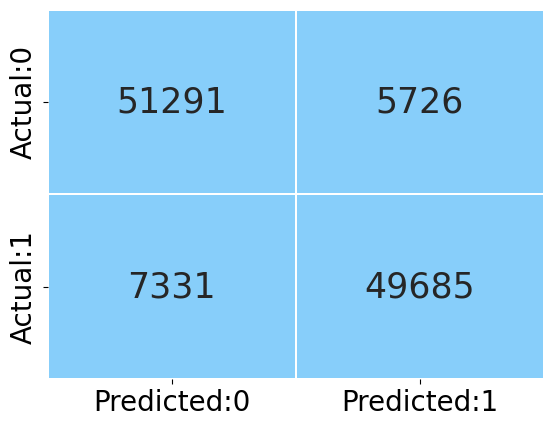

In [117]:
cm = confusion_matrix(ytest_smote, ypred_rfc1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

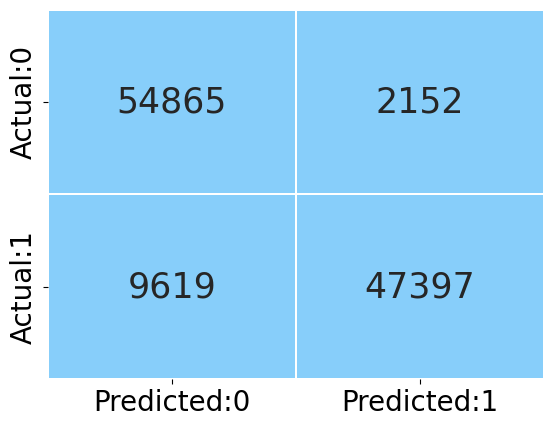

In [118]:
cm = confusion_matrix(ytest_smote, ypred_xgb_GS_SM)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()